In [1]:
from gfn import GFNAgent

In [2]:
agent = GFNAgent(epochs=200, env_len=20)

First, let's take a look at the environment. The default is a 2D 8x8 grid with high reward in the corners.

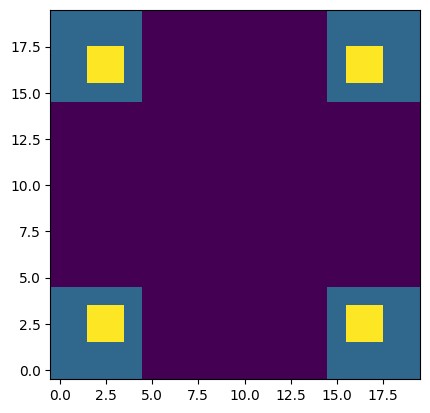

In [3]:
agent.env.plot_reward_2d()

We can also look at the model structure. Notice that in this implementation, the learned parameter `z0` is separate from the neural net, and that the neural net has two output "heads": `foward_policy` and `backward_policy`. 

In [4]:
agent.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 2, 20)]      0           []                               
                                                                                                  
 flatten (Flatten)              (None, 40)           0           ['input[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 32)           1312        ['flatten[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 32)           1056        ['dense_1[0][0]']                
                                                                                              

In [5]:
agent.z0

<tf.Variable 'z0:0' shape=() dtype=float32, numpy=0.0>

For this demonstration, we'll just show that the GFlowNet can learn a policy that generates trajectories proportional to the reward. To do that, we'll first sample a large training set using the untrained, random policy.

157/157 [==============================] - 0s 1ms/step


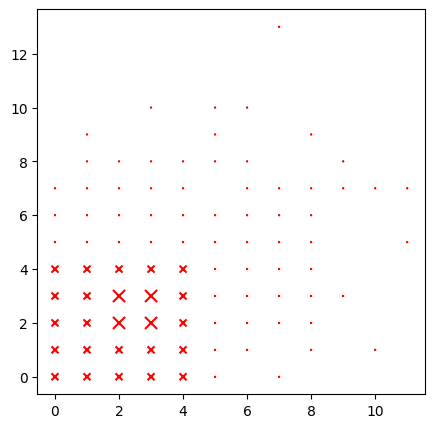

In [6]:
agent.sample(5000)
agent.plot_sampled_data_2d()

In [7]:
u_modes, u_positions = agent.count_modes()
print(f'There are {u_modes} unique modes and {u_positions} unique positions in the training data.')

There are 4 unique modes and 88 unique positions in the training data.


Before training, the policy is uniform. The likelihood of transitioning vertically or laterally (arrows) or terminating (red octogon) is essentially uniform at every point.

The probability of terminating at each position is plotted below, and we can see that without training, it looks nothing like the reward environment we plotted above. The termination probabilities are large enough, that any trajectory is unlikely to leave the origin (bottom left).

13/13 [==============================] - 0s 1ms/step


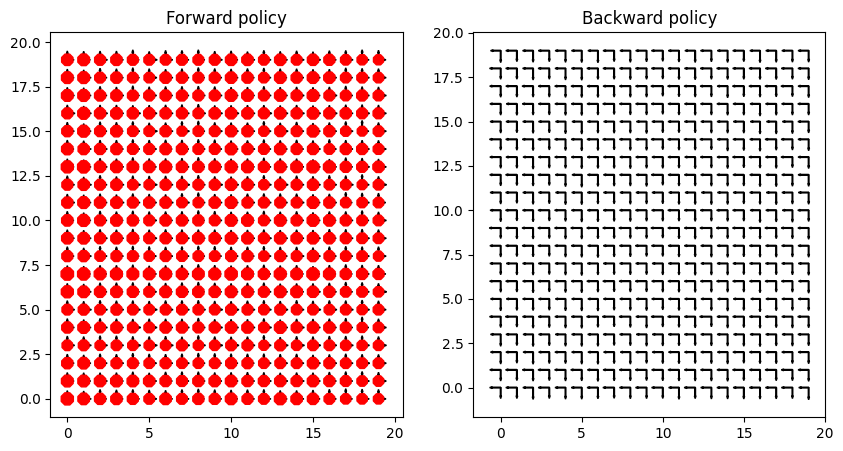

In [8]:
agent.plot_policy_2d()

63/63 [==============================] - 0s 1ms/step


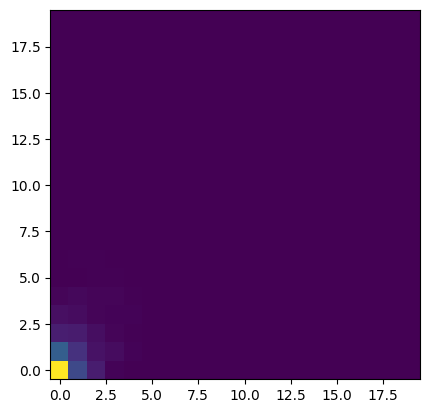

In [9]:
l1_error_before = agent.compare_env_to_model_policy()

Let's train it and see if we can do better!

In [12]:
agent.sample(1000)
agent.train()

32/32 [==============================] - 0s 866us/step
Start training...
Epoch: 0 Loss: 4.482220649719238
Epoch: 9 Loss: 0.9003902077674866
Epoch: 18 Loss: 0.903713047504425
Epoch: 27 Loss: 0.6017232537269592
Epoch: 36 Loss: 0.7922801375389099
Epoch: 45 Loss: 0.430560439825058
Epoch: 54 Loss: 0.16391806304454803
Epoch: 63 Loss: 0.047373559325933456
Epoch: 72 Loss: 0.08037005364894867
Epoch: 81 Loss: 0.013881908729672432
Epoch: 90 Loss: 0.057220153510570526
Epoch: 99 Loss: 0.007026303559541702
Epoch: 108 Loss: 0.003532719099894166
Epoch: 117 Loss: 0.0029486194252967834
Epoch: 126 Loss: 0.005371945910155773
Epoch: 135 Loss: 0.004071798641234636
Epoch: 144 Loss: 0.0027856987435370684
Epoch: 153 Loss: 0.001507580396719277
Epoch: 162 Loss: 0.0011520342668518424
Epoch: 171 Loss: 0.0011046171421185136
Epoch: 180 Loss: 0.0008840718073770404
Epoch: 189 Loss: 0.0008552380022592843
Epoch: 198 Loss: 0.0014862463576719165


Let's plot the trained policy and sample from it to get a probability distribution over the environment:

13/13 [==============================] - 0s 1ms/step


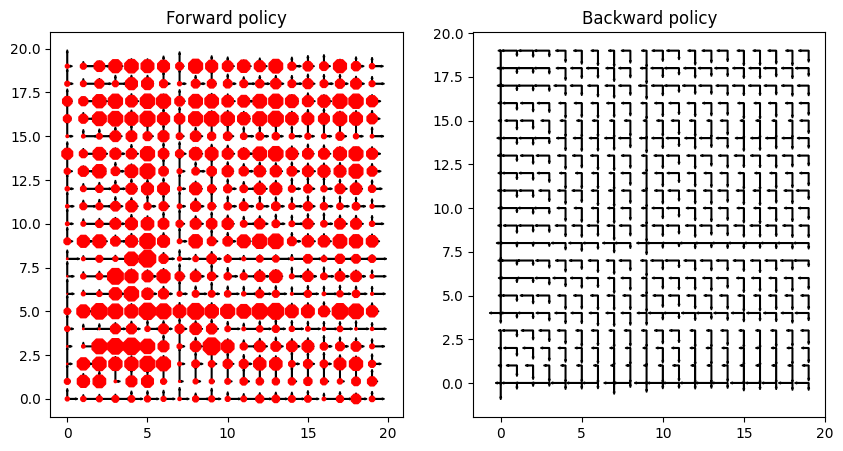

In [11]:
agent.plot_policy_2d()

In [ ]:
l1_error_after = agent.compare_env_to_model_policy()

In [ ]:
print(f'L1 error before {l1_error_before:.2f} and after {l1_error_after:.2f}')

While not perfect, the model has certainly learned to generate trajectories through the environment with probability proportional to the reward! It's a far better approximation than the untrained policy, and you can imagine that it would get better with some tweaks (e.g. more training, different optimizer, etc.)

In [2]:
from gfn import GFNAgent
agent = GFNAgent(epochs=200)
l = agent.sample_trajectories(2)

1/1 [==============================] - 0s 150ms/step
[[0.376489   0.25777655 0.36573445]
 [0.37648899 0.25777654 0.36573447]]
[[0. 1. 0.]
 [0. 0. 1.]]
1/1 [==============================] - 0s 24ms/step
[[0.34950482 0.31951355 0.33098163]
 [0.37648899 0.25777654 0.36573447]]
[[0. 0. 1.]
 [0. 0. 1.]]
1/1 [==============================] - 0s 25ms/step
[[0.34950482 0.31951355 0.33098163]
 [0.33333333 0.33333333 0.33333333]]
[[0. 0. 1.]
 [0. 0. 1.]]
1/1 [==============================] - 0s 28ms/step
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
[[0. 0. 1.]
 [1. 0. 0.]]
1/1 [==============================] - 0s 30ms/step
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
[[0. 1. 0.]
 [0. 0. 1.]]
1/1 [==============================] - 0s 36ms/step
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
[[1. 0. 0.]
 [1. 0. 0.]]
1/1 [==============================] - 0s 31ms/step
[[0.33333333 0.33333333 0.33333333]
 [0.3333333

In [ ]:
l[0].shape, l[1].shape

In [ ]:
import tensorflow as tf
one_hot_positions = tf.one_hot(l[0][0], 8, axis=-1)
one_hot_positions[0]

In [ ]:
import tensorflow_probability as tfp
tfd = tfp.distributions
for i, action in enumerate(tfd.Categorical(probs=l[1][0]).sample().numpy()):
    print(action == (agent.action_space - 1))

In [ ]:
l[1][0]